In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Load the dataset into a pandas DataFrame.

In [26]:
df = pd.read_excel("data.xlsx")
df.head()

,Employee_ID,Monthly_Expense
0,1,295
1,2,310
2,3,320
3,4,305
4,5,315


2. Use descriptive statistics (mean, median, standard deviation, etc.) to 
understand the data distribution.

In [7]:
column_name = "Monthly_Expense"
mean = df[column_name].mean()
median = df[column_name].median()
std = df[column_name].std()

print("The Mean: ",mean)
print("The Median: ", median)
print("The Standard Deviation: ",std)

The Mean:  329.5
The Median:  310.0
The Standard Deviation:  113.47451483589334


In [8]:
#3.  Apply one of the following methods to detect outliers:
#- Z-score method (values with |z| > 3)
#- IQR method (values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

- Z-score method (values with |z| > 3)

In [40]:
df["Z-score"] = (df[column_name] - mean) / std
outliers = df[np.abs(df["Z-score"])>3]
print(outliers)

    Employee_ID  Monthly_Expense  values_capped  study_hours_capped  \
27           28              700          337.5               337.5   
28           29              750          337.5               337.5   

    study_hours   Z-score  
27        337.5  3.265050  
28        337.5  3.705678  


- IQR method (values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

In [24]:
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(lower)
print(upper)
outliers = df[(df[column_name] < lower) | (df[column_name] > upper)]
print(outliers)

277.5
337.5
    Employee_ID  Monthly_Expense  Monthly_Expense  
26           27              120              169.3
27           28              700              700.0
28           29              750              735.5


4.  Print the list of detected outliers and visualize them using a boxplot.

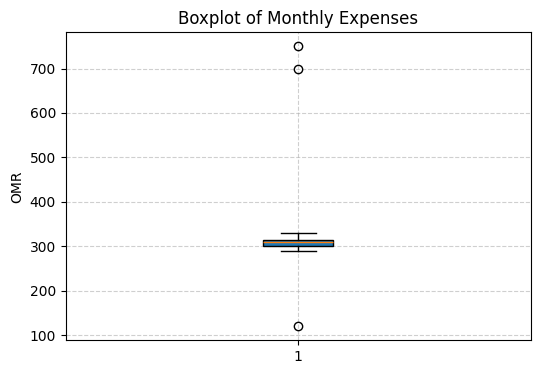

In [11]:
plt.figure(figsize=(6, 4))
plt.boxplot(df[column_name], vert=True, patch_artist=True)
plt.title("Boxplot of Monthly Expenses")
plt.ylabel("OMR")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

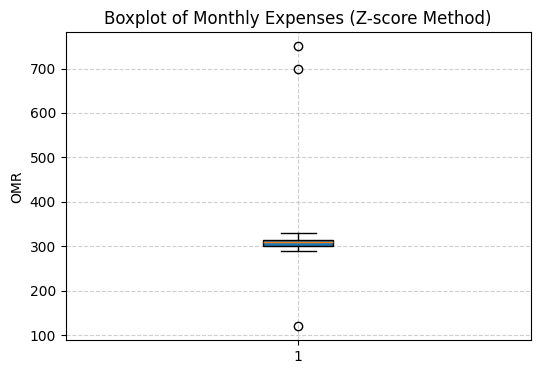

In [12]:
plt.figure(figsize=(6, 4))
plt.boxplot(df[column_name], vert=True, patch_artist=True)
plt.title("Boxplot of Monthly Expenses (Z-score Method)")
plt.ylabel("OMR")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [14]:
#----------------------------------------------------------------------------

cap or winssorize with outlinersin python

In [29]:
#Way 1

Q1 = df['Monthly_Expense'].quantile(0.25)
Q3 = df['Monthly_Expense'].quantile(0.75)
IQR = Q3 - Q1

lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR
print(lower_cap)
print(upper_cap)
df['values_capped'] = np.clip(df['Monthly_Expense'], lower_cap, upper_cap)
print(df)


277.5
337.5
    Employee_ID  Monthly_Expense  values_capped
0             1              295          295.0
1             2              310          310.0
2             3              320          320.0
3             4              305          305.0
4             5              315          315.0
5             6              290          290.0
6             7              300          300.0
7             8              310          310.0
8             9              325          325.0
9            10              295          295.0
10           11              305          305.0
11           12              315          315.0
12           13              320          320.0
13           14              330          330.0
14           15              310          310.0
15           16              295          295.0
16           17              305          305.0
17           18              290          290.0
18           19              315          315.0
19           20             

In [31]:
#way 2 Replace outliers using filterating
df['study_hours_capped'] = np.where(df['Monthly_Expense'] > upper, upper,
                             np.where(df['Monthly_Expense'] < lower, lower, df['Monthly_Expense']))
df

,Employee_ID,Monthly_Expense,values_capped,study_hours_capped
0,1,295,295.0,295.0
1,2,310,310.0,310.0
2,3,320,320.0,320.0
3,4,305,305.0,305.0
4,5,315,315.0,315.0
5,6,290,290.0,290.0
6,7,300,300.0,300.0
7,8,310,310.0,310.0
8,9,325,325.0,325.0
9,10,295,295.0,295.0


In [36]:
#way 3 using replace methods
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_low = df[df['Monthly_Expense'] < lower]['Monthly_Expense']
outliers_high = df[df['Monthly_Expense'] > upper]['Monthly_Expense']

df['study_hours'] = df['Monthly_Expense'].replace(outliers_low.tolist(), lower)
df['study_hours'] = df['Monthly_Expense'].replace(outliers_high.tolist(), upper)

print("Lower Cap:", lower)
print("Upper Cap:", upper)
print(df)

Lower Cap: 277.5
Upper Cap: 337.5
    Employee_ID  Monthly_Expense  values_capped  study_hours_capped  \
0             1              295          295.0               295.0   
1             2              310          310.0               310.0   
2             3              320          320.0               320.0   
3             4              305          305.0               305.0   
4             5              315          315.0               315.0   
5             6              290          290.0               290.0   
6             7              300          300.0               300.0   
7             8              310          310.0               310.0   
8             9              325          325.0               325.0   
9            10              295          295.0               295.0   
10           11              305          305.0               305.0   
11           12              315          315.0               315.0   
12           13              320          3